In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn import metrics

import time

In [94]:
df = pd.read_csv("dataframe.csv", index_col=None, header=0)

In [95]:
df = df.sample(frac=1).reset_index(drop=True)
df.drop('Unnamed: 0', inplace=True, axis=1)

In [96]:
#df = df[:10000]

In [97]:
df.head()

,Temperature,Month,Resolved,Fatal,City_Mississauga,City_Newmarket,City_Oakville,City_Ottawa,City_Toronto,City_Whitby,...,Age Group_20s,Age Group_30s,Age Group_40s,Age Group_50s,Age Group_60s,Age Group_70s,Age Group_80s,Age Group_90+,Age Group_<20,Age Group_UNKNOWN
0,0.684579,9,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.280374,12,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0.649533,10,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.535047,12,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0.313084,12,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
X = df
y = X.pop("Month").values

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [98]:
#gradient boost 
timer_start = time.perf_counter()
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
timer_end = time.perf_counter()
total_time = timer_end - timer_start
y_predict_gb = gb.predict(X_test)

print("Time taken to construct model: " + str(total_time) + " seconds")
print("Gradient Boost Accuracy: " + str(accuracy_score(y_test, y_predict_gb)))
print("Gradient Boost Precision: " + str(precision_score(y_test, y_predict_gb, average='weighted')))
print("Gradient Boost Recall: " + str(recall_score(y_test, y_predict_gb, average='weighted')))
print("Gradient Boost F-Score: " + str(f1_score(y_test, y_predict_gb, average='weighted')))

Time taken to construct model: 21.95198071503546 seconds
Gradient Boost Accuracy: 0.8363081617086193
Gradient Boost Precision: 0.8385215982173284
Gradient Boost Recall: 0.8363081617086193
Gradient Boost F-Score: 0.8345171261639771


Feature Importance:
0 Temperature weight: 0.909549772057383
3 City_Mississauga                                        weight: 0.017203406432056517
4 City_Newmarket                                          weight: 0.012723600760728798
6 City_Ottawa                                             weight: 0.02131705040755422
7 City_Toronto                                            weight: 0.028949055831377548


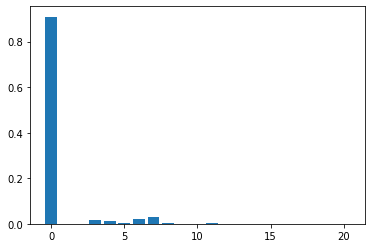

In [102]:
weights = (gb.feature_importances_)
print("Feature Importance:")
index = 0
for i in X:
    if weights[index]>=0.01:
        print(str(index) + " " + i + " weight: " +  str(weights[index]))
    index += 1
    
# plot
pyplot.bar(range(len(gb.feature_importances_)), gb.feature_importances_)
pyplot.show()

In [99]:
#Random Forest
timer_start = time.perf_counter()
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
timer_end = time.perf_counter()
total_time = timer_end - timer_start
rf_predict = rf.predict(X_test)

print("Time taken to construct model: " + str(total_time) + " seconds")
print("Random Forest Accuracy: " + str(accuracy_score(y_test, rf_predict)))
print("Random Forest Precision: " + str(precision_score(y_test, rf_predict, average='weighted')))
print("Random Forest Recall: " + str(recall_score(y_test, rf_predict, average='weighted')))
print("Random Forest F-Score: " + str(f1_score(y_test, rf_predict, average='weighted')))

Time taken to construct model: 0.4420440249959938 seconds
Random Forest Accuracy: 0.9018459191456903
Random Forest Precision: 0.9038207360037677
Random Forest Recall: 0.9018459191456903
Random Forest F-Score: 0.9021300848191429


Feature Importance:
0 Temperature weight: 0.9633482179246139


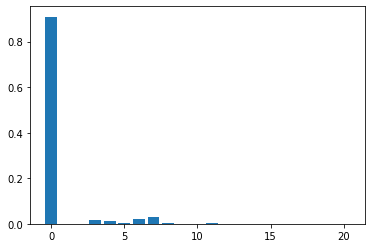

In [101]:
weights = (rf.feature_importances_)
index = 0
print("Feature Importance:")
for i in X:
    if weights[index]>=0.01:
        print(str(index) + " " + i + " weight: " +  str(weights[index]))
    index += 1
    
# plot
pyplot.bar(range(len(gb.feature_importances_)), gb.feature_importances_)
pyplot.show()

In [100]:
#Decision Tree
timer_start = time.perf_counter()
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
timer_end = time.perf_counter()
total_time = timer_end - timer_start
dt_predict = dt.predict(X_test)

print("Time taken to construct model: " + str(total_time) + " seconds")
print("Decision Tree Accuracy: " + str(accuracy_score(y_test, dt_predict)))
print("Decision Tree Precision: " + str(precision_score(y_test, dt_predict, average='weighted')))
print("Decision Tree Recall: " + str(recall_score(y_test, dt_predict, average='weighted')))
print("Decision Tree F-Score: " + str(f1_score(y_test, dt_predict, average='weighted')))

Time taken to construct model: 0.14775780297350138 seconds
Decision Tree Accuracy: 0.912372234935164
Decision Tree Precision: 0.9149541214458579
Decision Tree Recall: 0.912372234935164
Decision Tree F-Score: 0.9128640153745325


Feature Importance:
0 Temperature weight: 0.8138769050822869
3 City_Mississauga                                        weight: 0.03403276387376705
4 City_Newmarket                                          weight: 0.023535387051680453
5 City_Oakville                                           weight: 0.01703630047814992
6 City_Ottawa                                             weight: 0.019982966063275664
7 City_Toronto                                            weight: 0.05764685372027318
8 City_Whitby                                             weight: 0.020750887725482114


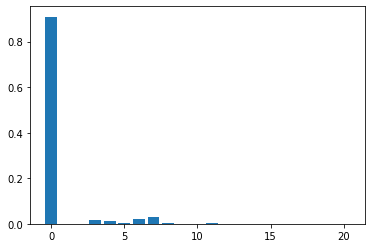

In [103]:
weights = (dt.feature_importances_)
print("Feature Importance:")
index = 0
for i in X:
    if weights[index]>=0.01:
        print(str(index) + " " + i + " weight: " +  str(weights[index]))
    index += 1
    
# plot
pyplot.bar(range(len(gb.feature_importances_)), gb.feature_importances_)
pyplot.show()